# Pachete necesare pentru folosirea acestui Notebook

Vom folosi [scipy](https://scipy.org/), [numpy](https://numpy.org/) și [matplotlib](https://matplotlib.org/).

In [2]:
from scipy import misc, ndimage
import numpy as np

import matplotlib.pyplot as plt

# Imaginea cu care lucrăm

Vom folosi o imagine din setul de date oferit implicit de către scipy.

/tmp/ipykernel_15342/3936888326.py:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  X = misc.face(gray=True)


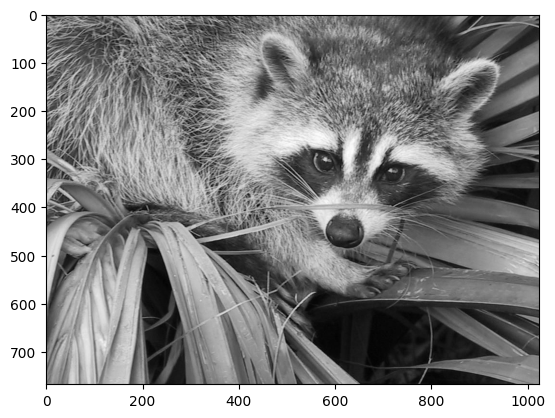

In [3]:
X = misc.face(gray=True)
plt.imshow(X, cmap=plt.cm.gray)
plt.show()

# Transformata Fourier a unei imagini

Transformata Fourier Discretă se extinde ușor la mai multe dimensiuni. Pentru un semnal bidimensional precum o imagine DFT devine:

$$
Y_{m_1,m_2} = \sum_{n_1=0}^{N_1-1}\sum_{n_2=0}^{N_2-1}x_{n_1,n_2}e^{-j2\pi(m_1 n_1/N_1 + m_2 n_2/N_2)}
$$

* unde $n_1$ și $n_2$ sunt pozițile pixelilor pe orizontală, respectiv, pe verticală
* bin-urile rezultate corespund pozițiilor pixelilor
* spectrul este în continuare simetric
* proprietățile transformatei DFT 1D sunt respectate și în cazul celei 2D

În continuare vom folosi rutina generală `fft2` ce servește mai bine activității de învățare, deși pentru semnale reale ar trebui să folosim `rfft2` ce întoarce doar informația esențială (ex. omite simetriile). De asemenea vom analiza spectrul în scală logaritmică pentru a diferenția mai bine magnitudinile bin-urilor DTF.

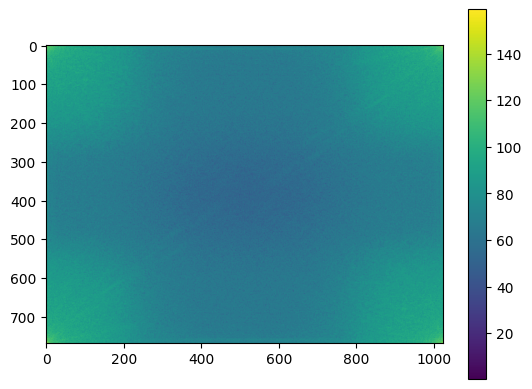

In [4]:
Y = np.fft.fft2(X)
freq_db = 20*np.log10(abs(Y))

plt.imshow(freq_db)
plt.colorbar()
plt.show()

Operațiile efectuate direct asupra imaginii se reflectă și în spectrul acesteia. Iată un exemplu a unei rotații de 45 de grade:

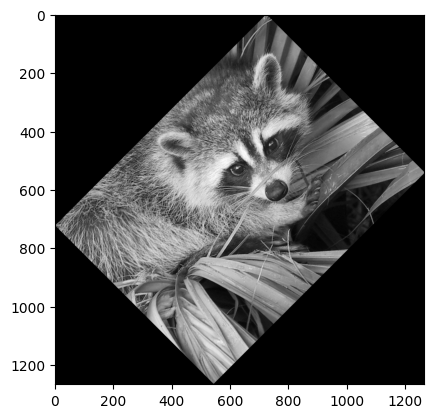

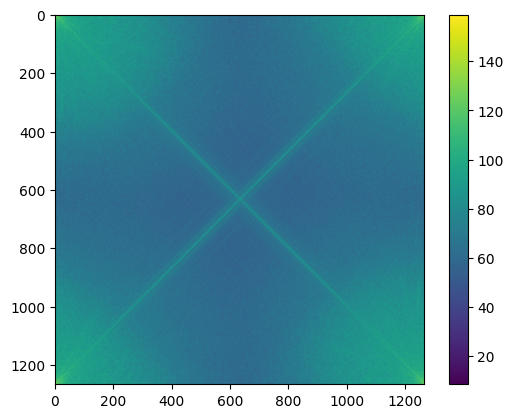

In [5]:
rotate_angle = 45
X45 = ndimage.rotate(X, rotate_angle)
plt.imshow(X45, cmap=plt.cm.gray)
plt.show()

Y45 = np.fft.fft2(X45)
plt.imshow(20*np.log10(abs(Y45)))
plt.colorbar()
plt.show()

Momentan pe axe sunt afișate numărul bin-urilor. Pentru a obține frecvențele asociate folosiți `fftfreq`:

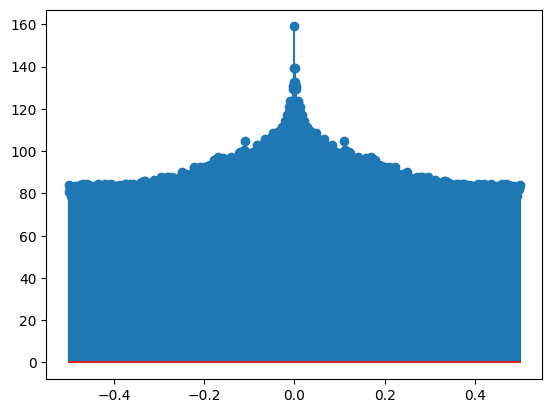

In [6]:
freq_x = np.fft.fftfreq(X.shape[1])
freq_y = np.fft.fftfreq(X.shape[0])

plt.stem(freq_x, freq_db[:][0])
plt.show()

# Atenuarea frecvențelor înalte

Pentru a anula frecvențele de peste un anumit prag `freq_cutoff` putem pur și simplu anula intrările din spectru și aplica transformata Fourier inversă:

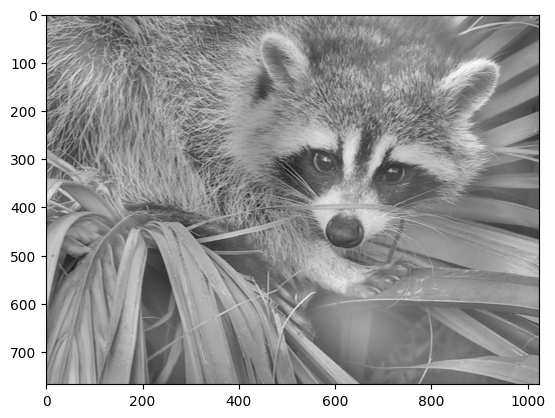

In [37]:
freq_cutoff = 130

Y_cutoff = Y.copy()
Y_cutoff[freq_db > freq_cutoff] = 0
X_cutoff = np.fft.ifft2(Y_cutoff)
X_cutoff = np.real(X_cutoff)    # avoid rounding erros in the complex domain,
                                # in practice use irfft2
plt.imshow(X_cutoff, cmap=plt.cm.gray)
plt.show()

# Zgomot

Zgomotul alb perturbă în mod egal spectrul semnalului. Este astfel egal distribuit și regăsit în toate bin-urile DFT. [Zgomotul color](https://en.wikipedia.org/wiki/Colors_of_noise) se schimbă de-a lungul frecvențelor.

Putem adăuga zgomot în limita a `pixel_noise` pixeli imaginii folosind `random.randint`:

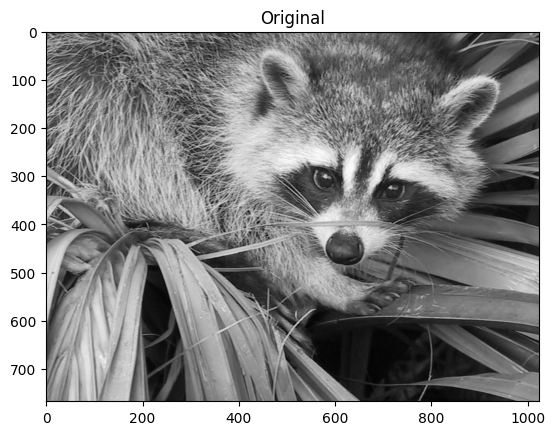

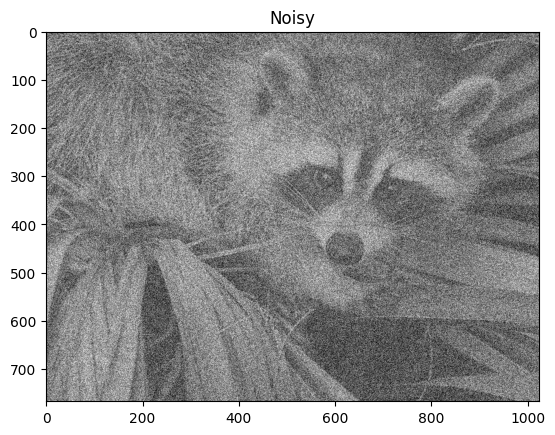

In [8]:
pixel_noise = 200

noise = np.random.randint(-pixel_noise, high=pixel_noise+1, size=X.shape)
X_noisy = X + noise
plt.imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.show()
plt.imshow(X_noisy, cmap=plt.cm.gray)
plt.title('Noisy')
plt.show()

# Sarcini

1. Produceți imaginile și spectrul pentru funcțiile de mai jos și dați o explicație scurtă pentru fiecare rezultat.
* $x_{n_1,n_2} = \sin(2\pi n_1 + 3\pi n_2)$
* $x_{n_1,n_2} = \sin(4\pi n_1) + \cos(6\pi n_2)$
* $Y_{0,5} = Y_{0,N-5} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$
* $Y_{5,0} = Y_{N-5,0} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$
* $Y_{5,5} = Y_{N-5,N-5} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$

*Atenție*: $x$ reprezintă informație în domeniul timpului, $Y$ în domeninul frecvenței.

2. Comprimați imaginea cu ratonul de mai sus prin atenuarea frecvențelor înalte până la un prag SNR autoimpus.

3. Eliminați zgomotul adăugat la imaginea cu ratonul produsă mai sus. Prezentați raportul SNR înainte și după.

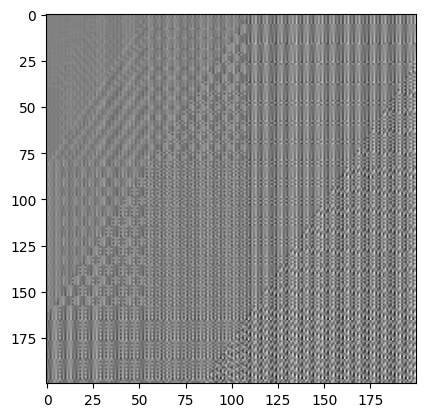

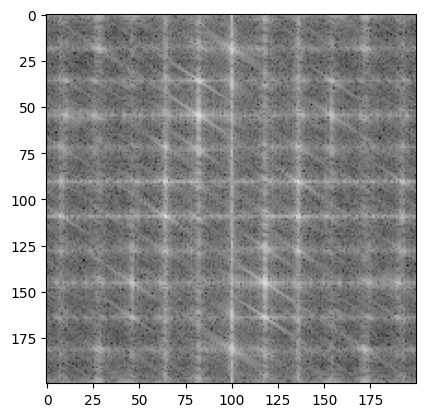

In [9]:
n1 = 200
n2 = 200
x1 = np.zeros((n1,n2))
for i in range(n1):
    
    for j in range(n2):
        x1[i][j] = np.sin(2*np.pi*i+3*np.pi*j)
%matplotlib inline
plt.imshow(x1,cmap='gray')
plt.show()
plt.imshow(np.log10(abs(np.fft.fft2(x1))),cmap='gray')
# spectrul are sens, pentru ca si imaginea de baza are multe repetitii, are nevoie doar de anumite frecvente

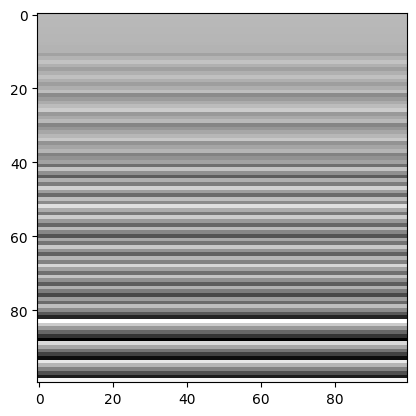

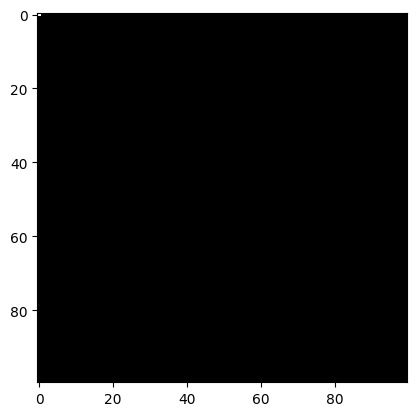

In [10]:
n1= 100
n2 =100

x2= np.zeros((n1,n2))
for i in range(n1):
    for j in range(n2):
        x2[i][j] = np.sin(4*np.pi*i)+np.cos(6*np.pi*j)

%matplotlib inline
plt.imshow(x2,cmap='gray')
plt.show()
plt.imshow(np.log10(abs(np.fft.fft2(x2))+1),cmap='gray')
# cum se poate vedea, imaginea este super usor de comprimat, pentru ca arata mult ca un sinus vertical. Din cauza asta, FFT are nevoie de foarte putine valori, 
# din cauza asta numai un patrat mic sus stanga este aprins.


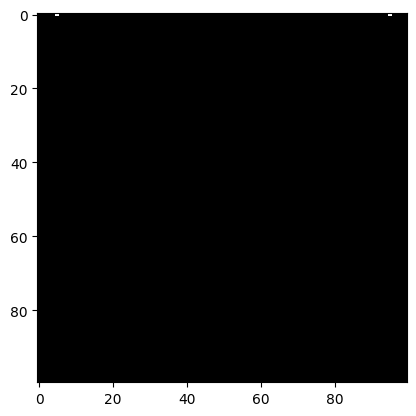

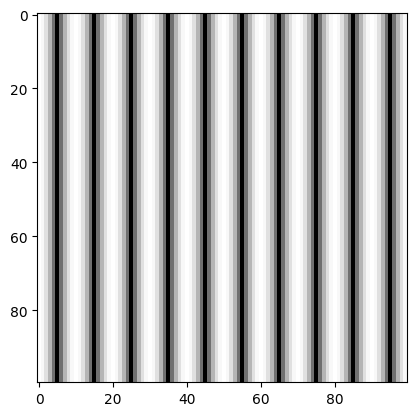

In [11]:
N = 100

Y1  = np.zeros((N,N))
Y1[0][5] = 1
Y1[0][N-5] = 1

%matplotlib inline
plt.imshow(Y1,cmap='gray')
plt.show()
plt.imshow(np.log10(abs(np.fft.fft2(Y1))+1),cmap='gray')

# are sens sa avem o functie sinus care iese in spectru, pentru ca fft este "propria sa inversa", daca aplicam fft pe sinus, ne asteptam sa avem (niste) puncte, 
# daca o aplicam pe niste puncte, (un punct de ex.) atuncea ne asteptam sa obtinem un sinus in return.

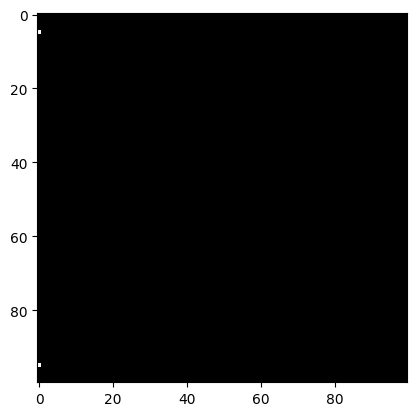

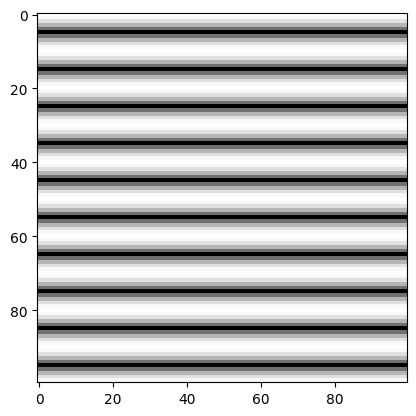

In [12]:
N = 100

Y1  = np.zeros((N,N))
Y1[5][0] = 1
Y1[N-5][0] = 1

%matplotlib inline
plt.imshow(Y1,cmap='gray')
plt.show()
plt.imshow(np.log10(abs(np.fft.fft2(Y1))+1),cmap='gray')
# are sens ca acest spectru sa fie cel de mai intai, dar rotit 90 de grade, pentru ca si imaginea folosita 
# este aceasi, dar rotita 90 de grade

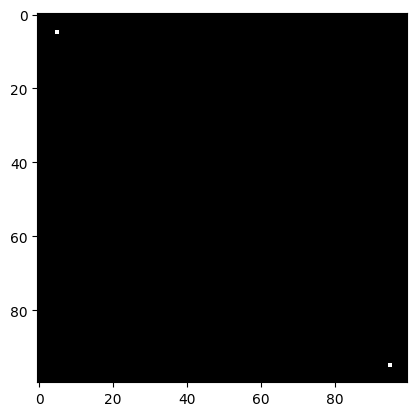

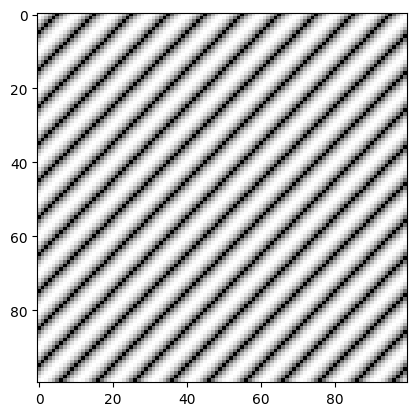

In [13]:
N = 100

Y1  = np.zeros((N,N))
Y1[5][5] = 1
Y1[N-5][N-5] = 1

%matplotlib inline
plt.imshow(Y1,cmap='gray')
plt.show()
plt.imshow(np.log10(abs(np.fft.fft2(Y1))+1),cmap='gray')
# practic, am rotit spectrul cu 45 de grade, pentru ca si punctele au fost rotite cu 45 de grade.